### Evaluating WDF Circuit classes

In [13]:
from wdf import *
from utils import *

In [14]:
## generate test signals
fs = 44100
sin = gen_test_wave(fs,1000,1,.5,'sin')
delta = gen_test_wave(fs,1000,1,.1,'delta')

### Passive LPF frequency response vs spice


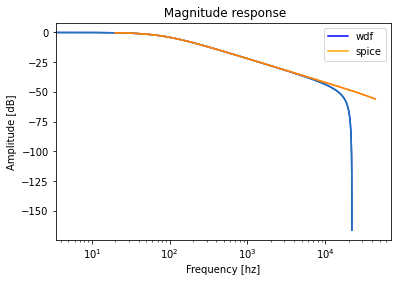

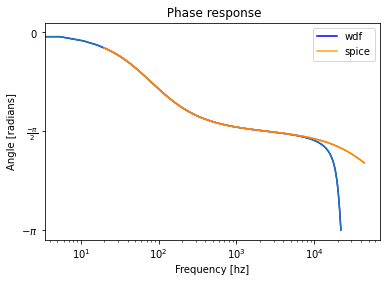

In [15]:
LPF = PassiveLPF(fs,cutoff=1000)
out = np.zeros(len(delta))

for i in range(len(delta)):
  out[i] = LPF(delta[i])

spice_path = './spice/passive_LPF_1000hz.txt'
compare_vs_spice(out,fs,spice_path)

### Diode clipper frequency response vs spice

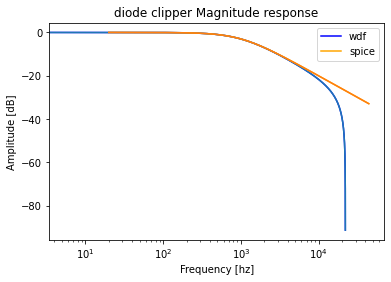

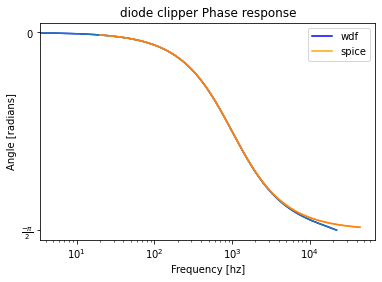

In [16]:

Diode_Clipper = DiodeClipper(fs,cutoff=1000,input_gain_db=0,output_gain_db=0,n_diodes=2)
out = np.zeros(len(delta))

for i in range(len(delta)):
  out[i] = Diode_Clipper(delta[i])

spice_path = './spice/diode-clipper-frequency-analysis-1000hz.txt'
compare_vs_spice(out,fs,spice_path,title='diode clipper')

### Diode clipper sine wave analysis

<class 'wdf.DiodeClipper'>


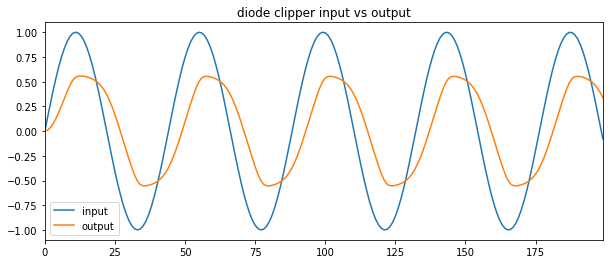

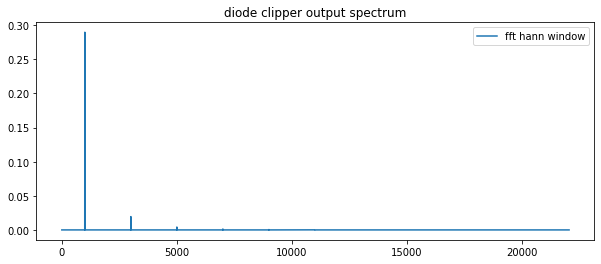

In [17]:
Diode_Clipper = DiodeClipper(fs,cutoff=1000,input_gain_db=0,output_gain_db=0,n_diodes=2)
out = np.zeros(len(sin))

for i in range(len(sin)):
  out[i] = Diode_Clipper(sin[i])

compare_plot(sin,out,200,title='diode clipper input vs output')
plot_fft(out,fs,title='diode clipper output spectrum')